In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Arrays that contain the information for getting the data, as well as storage for the data
files = np.array(["energy_level_calculator/energy_level_data/energy_levels_npi_1_pmax_3_sorted_emin_0_6680_emax_2_0000.txt", \
                  "energy_level_calculator/energy_level_data/energy_levels_npi_2_pmax_3_sorted_emin_0_6680_emax_2_0000.txt", \
                  "energy_level_calculator/energy_level_data/energy_levels_npi_3_pmax_3_sorted_emin_0_6680_emax_2_0000.txt", \
                  "energy_level_calculator/energy_level_data/energy_levels_npi_4_pmax_2_sorted_emin_0_6680_emax_2_0000.txt", \
                  "energy_level_calculator/energy_level_data/energy_levels_npi_5_pmax_1_sorted_emin_0_6680_emax_2_0000.txt", \
                  "energy_level_calculator/energy_level_data/energy_levels_npi_6_pmax_1_sorted_emin_0_6680_emax_2_0000.txt"])
energy_diagram_data = {"energy_level_calculator/energy_level_data/energy_levels_npi_1_pmax_3_sorted_emin_0_6680_emax_2_0000.txt":{}, \
                      "energy_level_calculator/energy_level_data/energy_levels_npi_2_pmax_3_sorted_emin_0_6680_emax_2_0000.txt":{}, \
                      "energy_level_calculator/energy_level_data/energy_levels_npi_3_pmax_3_sorted_emin_0_6680_emax_2_0000.txt":{}, \
                      "energy_level_calculator/energy_level_data/energy_levels_npi_4_pmax_2_sorted_emin_0_6680_emax_2_0000.txt":{}, \
                      "energy_level_calculator/energy_level_data/energy_levels_npi_5_pmax_1_sorted_emin_0_6680_emax_2_0000.txt":{}, \
                      "energy_level_calculator/energy_level_data/energy_levels_npi_6_pmax_1_sorted_emin_0_6680_emax_2_0000.txt":{}}

total_energy_diagram_data = {}

odd_npis = np.array(["energy_level_calculator/energy_level_data/energy_levels_npi_1_pmax_3_sorted_emin_0_6680_emax_2_0000.txt", \
            "energy_level_calculator/energy_level_data/energy_levels_npi_3_pmax_3_sorted_emin_0_6680_emax_2_0000.txt", \
            "energy_level_calculator/energy_level_data/energy_levels_npi_5_pmax_1_sorted_emin_0_6680_emax_2_0000.txt"]) 
            # Because the zero-momentum state is forbidden for odd-numbers of pions (because one of the pions has to not be s-wave)

# System constants
min_energy = 0.668
max_energy = 2.000
min_energy_10000 = 6680
max_energy_10000 = 20000
energy_increment = 0.0001
energy_increment_inverse = 10000

In [3]:
# Load in files, and load the data corresponding to each dataset
for file in files:
    with open(file) as f:
        for line in f:
            try:
                energy, count = line.split(":")
                energy_diagram_data[file].update({float(energy):int(count)})
                
                if float(energy) in total_energy_diagram_data:
                    total_energy_diagram_data[float(energy)] += int(count)
            
                else:
                    total_energy_diagram_data.update({float(energy):int(count)})
            
            except ValueError:
                print("File ", file, ": ran into either faulty memory or the header. Continuing.")
                

File  energy_level_calculator/energy_level_data/energy_levels_npi_1_pmax_3_sorted_emin_0_6680_emax_2_0000.txt : ran into either faulty memory or the header. Continuing.
File  energy_level_calculator/energy_level_data/energy_levels_npi_2_pmax_3_sorted_emin_0_6680_emax_2_0000.txt : ran into either faulty memory or the header. Continuing.
File  energy_level_calculator/energy_level_data/energy_levels_npi_3_pmax_3_sorted_emin_0_6680_emax_2_0000.txt : ran into either faulty memory or the header. Continuing.
File  energy_level_calculator/energy_level_data/energy_levels_npi_4_pmax_2_sorted_emin_0_6680_emax_2_0000.txt : ran into either faulty memory or the header. Continuing.
File  energy_level_calculator/energy_level_data/energy_levels_npi_5_pmax_1_sorted_emin_0_6680_emax_2_0000.txt : ran into either faulty memory or the header. Continuing.
File  energy_level_calculator/energy_level_data/energy_levels_npi_6_pmax_1_sorted_emin_0_6680_emax_2_0000.txt : ran into either faulty memory or the header

In [4]:
# Delete the first energies of odd-numbered pion numbers
delete_energies = np.array([0.8565, 1.2335, 1.6105])

#del energy_diagram_data['energy_level_data/energy_levels_npi_1_pmax_4_sorted_emin_0_6680_emax_2_0000.txt'][0.8565]
for i in range(len(odd_npis)):
    del energy_diagram_data[odd_npis[i]][delete_energies[i]]
    
for d in delete_energies:
    del total_energy_diagram_data[d]
    
energy_diagram_data

{'energy_level_calculator/energy_level_data/energy_levels_npi_1_pmax_3_sorted_emin_0_6680_emax_2_0000.txt': {1.0401: 1,
  1.1792: 1,
  1.2984: 1,
  1.4052: 1,
  1.5032: 1,
  1.5944: 1,
  1.7614: 1,
  1.8388: 2,
  1.9128: 1,
  1.984: 1},
 'energy_level_calculator/energy_level_data/energy_levels_npi_2_pmax_3_sorted_emin_0_6680_emax_2_0000.txt': {1.045: 1,
  1.2285: 2,
  1.3132: 6,
  1.3677: 2,
  1.409: 2,
  1.4555: 8,
  1.4869: 2,
  1.4939: 1,
  1.4988: 12,
  1.5454: 6,
  1.5774: 4,
  1.5936: 2,
  1.5947: 4,
  1.5965: 2,
  1.624: 8,
  1.6263: 2,
  1.6501: 8,
  1.6797: 4,
  1.6917: 2,
  1.7014: 4,
  1.7358: 4,
  1.7396: 2,
  1.7479: 8,
  1.7569: 2,
  1.7673: 2,
  1.781: 6,
  1.7829: 2,
  1.7863: 8,
  1.7948: 4,
  1.7984: 6,
  1.8282: 1,
  1.8309: 4,
  1.8378: 12,
  1.8477: 8,
  1.8549: 6,
  1.8636: 4,
  1.8699: 8,
  1.8769: 8,
  1.8792: 4,
  1.8889: 8,
  1.8979: 2,
  1.898: 24,
  1.9101: 2,
  1.9187: 6,
  1.9326: 8,
  1.9348: 4,
  1.9376: 2,
  1.9434: 2,
  1.9498: 2,
  1.9749: 2,
  1.979:

In [5]:
#Create a bin histogram for the available energies
bins_10000 = [min_energy_10000-1]
index = 0
while bins_10000[len(bins_10000)-1] < max_energy_10000 :
    bins_10000.append(bins_10000[index] + 2)
    index += 1
    
bins = [(bins_10000[i] + 0.5)*energy_increment for i in range(len(bins_10000))]

In [6]:
all_energies = list(total_energy_diagram_data.keys())
all_energies.sort()
all_energies

[1.0401,
 1.045,
 1.1792,
 1.2285,
 1.2984,
 1.3132,
 1.3677,
 1.4052,
 1.409,
 1.4171,
 1.422,
 1.4555,
 1.4869,
 1.4939,
 1.4988,
 1.5017,
 1.5032,
 1.5454,
 1.5562,
 1.5563,
 1.5774,
 1.5936,
 1.5944,
 1.5947,
 1.5965,
 1.5975,
 1.6055,
 1.624,
 1.6263,
 1.644,
 1.6441,
 1.6501,
 1.6754,
 1.6797,
 1.6825,
 1.6853,
 1.6874,
 1.6875,
 1.6902,
 1.6903,
 1.6917,
 1.7014,
 1.7287,
 1.7339,
 1.7358,
 1.7396,
 1.7446,
 1.7447,
 1.7479,
 1.7569,
 1.7614,
 1.7659,
 1.766,
 1.7673,
 1.7751,
 1.781,
 1.7823,
 1.7829,
 1.7832,
 1.7851,
 1.7859,
 1.7863,
 1.7941,
 1.7948,
 1.7984,
 1.799,
 1.8125,
 1.8126,
 1.8147,
 1.8148,
 1.8244,
 1.8245,
 1.8282,
 1.8309,
 1.8324,
 1.8325,
 1.8326,
 1.8378,
 1.8386,
 1.8387,
 1.8388,
 1.8477,
 1.8537,
 1.8538,
 1.8549,
 1.856,
 1.8636,
 1.8639,
 1.8682,
 1.8683,
 1.8696,
 1.8697,
 1.8699,
 1.8709,
 1.871,
 1.8711,
 1.8737,
 1.8738,
 1.8759,
 1.876,
 1.8769,
 1.8786,
 1.8787,
 1.8792,
 1.8802,
 1.8889,
 1.8899,
 1.8971,
 1.8972,
 1.8979,
 1.898,
 1.9095,
 1.9

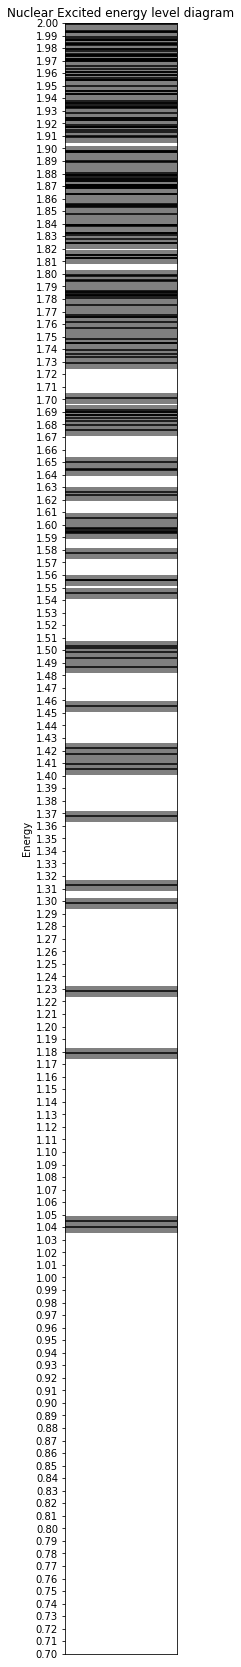

In [7]:
# Plot the energy level diagrams as a horizontal
e_lins = []
for e in all_energies:
    e_lins.append(np.array([e, e]))

x_trace = [0,1]


#all_energies
plt.figure(figsize = (2, 30))
for e in e_lins:
    plt.plot(x_trace, e, 'k-')
    plt.fill_between(x_trace, e+0.004, e-0.004, color='grey')
plt.xticks([])
plt.title("Nuclear Excited energy level diagram")
plt.ylabel("Energy")
plt.yticks(np.arange(0.7, 2.01, 0.01))
plt.ylim([0.7,2])
plt.xlim([0,1])
plt.show()

In [8]:
# Now, do the same for each file
all_energies_npival = {}
e_lins_npival = {}

for f in files:
    
    all_energies_npival.update({f:list(energy_diagram_data[f].keys())})
    e_lins_npival.update({f:[]})
    for e in all_energies_npival[f]:
        e_lins_npival[f].append(np.array([e,e]))
        
print(e_lins_npival[files[0]])

[array([1.0401, 1.0401]), array([1.1792, 1.1792]), array([1.2984, 1.2984]), array([1.4052, 1.4052]), array([1.5032, 1.5032]), array([1.5944, 1.5944]), array([1.7614, 1.7614]), array([1.8388, 1.8388]), array([1.9128, 1.9128]), array([1.984, 1.984])]


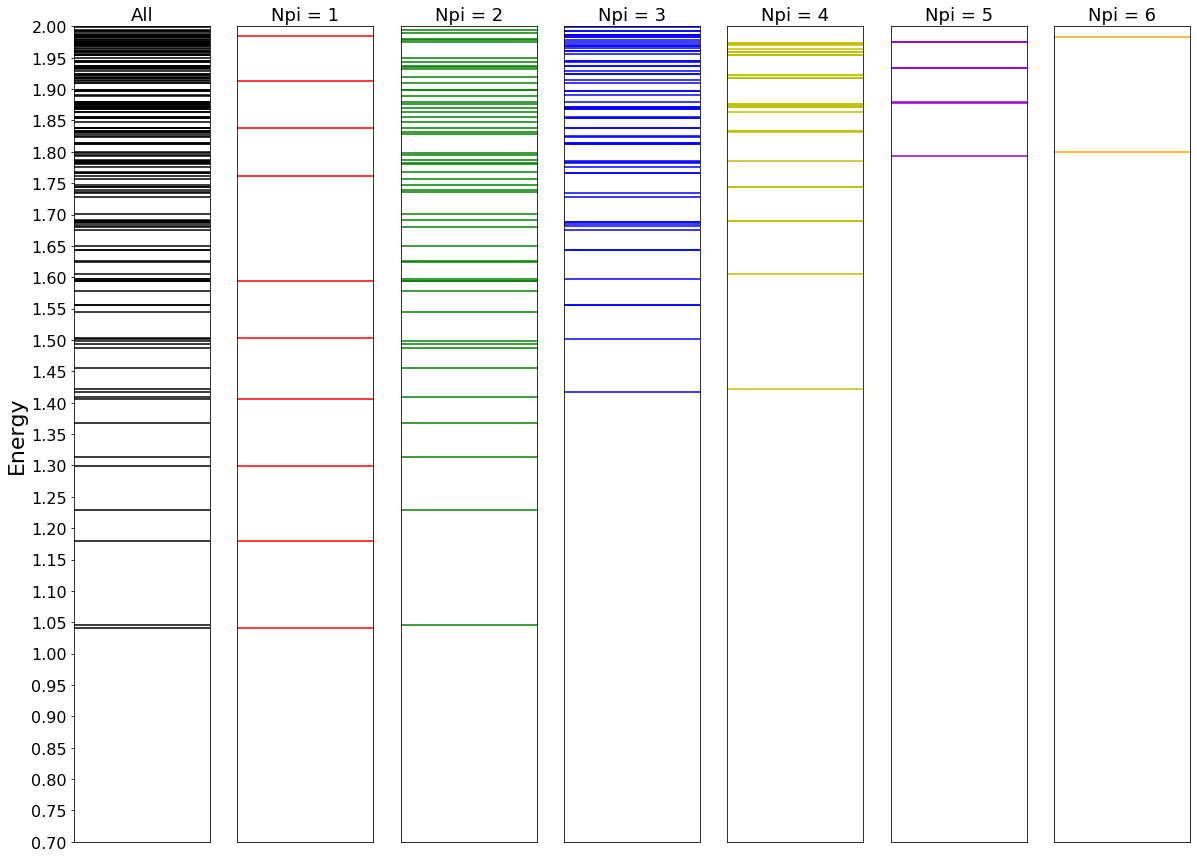

In [26]:
#plt.figure(figsize=(10,30))

fig, ((ax),(ax1), (ax2), (ax3), (ax4), (ax5), (ax6)) = plt.subplots(1, 7, figsize=(20, 15)) #, (ax7)

for e in e_lins:
    ax.plot(x_trace, e, 'k-')
    #ax.fill_between(x_trace, e+0.004, e-0.004, color='grey')
ax.get_xaxis().set_ticks([])
ax.set_title("All", fontsize = 18)
ax.set_ylabel("Energy", fontsize = 22)
ax.get_yaxis().set_ticks(np.arange(0.7, 2.05, 0.05))
ax.set_ylim([0.7,2])
ax.set_xlim([0,1])

plt.setp(ax.get_yticklabels(), fontsize=16)

for e in e_lins_npival[files[0]]:
    ax1.plot(x_trace, e, 'r-')
    #ax1.fill_between(x_trace, e+0.004, e-0.004, color='lightsalmon')
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
ax1.set_title("Npi = 1", fontsize = 18)
#ax1.set_ylabel("Energy")
#ax1.get_yaxis().set_ticks(np.arange(0.7, 2.01, 0.01))
ax1.set_ylim([0.7,2])
ax1.set_xlim([0,1])



for e in e_lins_npival[files[1]]:
    ax2.plot(x_trace, e, 'g-')
    #ax2.fill_between(x_trace, e+0.004, e-0.004, color='lightgreen')
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
ax2.set_title("Npi = 2", fontsize = 18)
#ax2.set_ylabel("Energy")
#ax2.get_yaxis().set_ticks(np.arange(0.7, 2.01, 0.01))
ax2.set_ylim([0.7,2])
ax2.set_xlim([0,1])

for e in e_lins_npival[files[2]]:
    ax3.plot(x_trace, e, 'b-')
    #ax3.fill_between(x_trace, e+0.004, e-0.004, color='cyan')
ax3.get_xaxis().set_ticks([])
ax3.get_yaxis().set_ticks([])
ax3.set_title("Npi = 3", fontsize = 18)
#ax3.set_ylabel("Energy")
#ax3.get_yaxis().set_ticks(np.arange(0.7, 2.01, 0.01))
ax3.set_ylim([0.7,2])
ax3.set_xlim([0,1])

for e in e_lins_npival[files[3]]:
    ax4.plot(x_trace, e, 'y-')
    #ax4.fill_between(x_trace, e+0.004, e-0.004, color='lightyellow')
ax4.get_xaxis().set_ticks([])
ax4.get_yaxis().set_ticks([])
ax4.set_title("Npi = 4", fontsize = 18)
#ax4.set_ylabel("Energy")
#ax4.get_yaxis().set_ticks(np.arange(0.7, 2.01, 0.01))
ax4.set_ylim([0.7,2])
ax4.set_xlim([0,1])

for e in e_lins_npival[files[4]]:
    ax5.plot(x_trace, e, color='darkviolet')
    #ax5.fill_between(x_trace, e+0.004, e-0.004, color='thistle')
ax5.get_xaxis().set_ticks([])
ax5.get_yaxis().set_ticks([])
ax5.set_title("Npi = 5", fontsize = 18)
#ax5.set_ylabel("Energy")
#ax5.get_yaxis().set_ticks(np.arange(0.7, 2.01, 0.01))
ax5.set_ylim([0.7,2])
ax5.set_xlim([0,1])

for e in e_lins_npival[files[5]]:
    ax6.plot(x_trace, e, color='orange')
    #ax6.fill_between(x_trace, e+0.004, e-0.004, color='navajowhite')
ax6.get_xaxis().set_ticks([])
ax6.get_yaxis().set_ticks([])
ax6.set_title("Npi = 6", fontsize = 18)
#ax6.set_ylabel("Energy")
#ax6.get_yaxis().set_ticks(np.arange(0.7, 2.01, 0.01))
ax6.set_ylim([0.7,2])
ax6.set_xlim([0,1])

#for e in e_lins_npival[files[6]]:
    #ax7.plot(x_trace, e, color='navy')
    #ax7.fill_between(x_trace, e+0.004, e-0.004, color='dodgerblue')
#ax7.get_xaxis().set_ticks([])
#ax7.set_title("npi = 7")
#ax7.set_ylabel("Energy")
#ax7.get_yaxis().set_ticks(np.arange(0.7, 2.01, 0.01))
#ax7.set_ylim([0.7,2])
#ax7.set_xlim([0,1])

fig.savefig("energylevel_diagram.png")

plt.show()

In [ ]:
all_energies_npival[files[0]]

In [ ]:
all_energies_npival[files[1]]

In [12]:
all_energies_npival[files[2]]

[1.3675,
 1.417,
 1.4171,
 1.5016,
 1.5017,
 1.5099,
 1.5512,
 1.5562,
 1.5945,
 1.5946,
 1.5975,
 1.5998,
 1.6015,
 1.6318,
 1.6357,
 1.641,
 1.644,
 1.6754,
 1.6825,
 1.6853,
 1.6874,
 1.6903,
 1.6904,
 1.7095,
 1.7196,
 1.7197,
 1.7286,
 1.7287,
 1.7316,
 1.7338,
 1.7339,
 1.7369,
 1.763,
 1.766,
 1.7751,
 1.7754,
 1.7781,
 1.7782,
 1.7823,
 1.7832,
 1.785,
 1.7851,
 1.794,
 1.7941,
 1.8042,
 1.8091,
 1.8092,
 1.8095,
 1.8125,
 1.8148,
 1.8166,
 1.8214,
 1.8215,
 1.8244,
 1.8245,
 1.8267,
 1.8268,
 1.8386,
 1.8387,
 1.8408,
 1.8435,
 1.8436,
 1.8525,
 1.8526,
 1.8527,
 1.8537,
 1.8538,
 1.8561,
 1.868,
 1.8682,
 1.8696,
 1.8697,
 1.8709,
 1.871,
 1.8779,
 1.8802,
 1.8869,
 1.8899,
 1.8904,
 1.8905,
 1.8938,
 1.8971,
 1.9,
 1.9001,
 1.9076,
 1.9095,
 1.9143,
 1.9144,
 1.9163,
 1.9164,
 1.9173,
 1.9179,
 1.9192,
 1.9242,
 1.9281,
 1.9282,
 1.9335,
 1.9336,
 1.9337,
 1.9364,
 1.9432,
 1.9433,
 1.9435,
 1.9436,
 1.9438,
 1.9439,
 1.9454,
 1.9466,
 1.9489,
 1.9558,
 1.9608,
 1.9609,
 1.9

In [13]:
all_energies_npival[files[3]]

[1.422,
 1.556,
 1.5561,
 1.6055,
 1.6056,
 1.6901,
 1.6902,
 1.6983,
 1.6984,
 1.7396,
 1.7397,
 1.7447,
 1.783,
 1.7831,
 1.7859,
 1.786,
 1.7883,
 1.7899,
 1.79,
 1.8203,
 1.8204,
 1.8242,
 1.8243,
 1.8295,
 1.8296,
 1.8325,
 1.8639,
 1.864,
 1.8709,
 1.8737,
 1.8738,
 1.8758,
 1.8759,
 1.876,
 1.8788,
 1.8789,
 1.8979,
 1.898,
 1.908,
 1.9081,
 1.9082,
 1.9171,
 1.9172,
 1.92,
 1.9201,
 1.9224,
 1.9225,
 1.924,
 1.9241,
 1.9253,
 1.9254,
 1.9514,
 1.9515,
 1.9516,
 1.9544,
 1.9545,
 1.9583,
 1.9584,
 1.9636,
 1.9637,
 1.9638,
 1.9665,
 1.9666,
 1.9667,
 1.9707,
 1.9716,
 1.9717,
 1.9735,
 1.9736,
 1.9825,
 1.9826,
 1.9827,
 1.9927,
 1.9928,
 1.9976,
 1.9977,
 1.998,
 1.9981,
 2.0]

In [14]:
all_energies_npival[files[4]]

[1.7445,
 1.7446,
 1.7941,
 1.8786,
 1.8787,
 1.8869,
 1.887,
 1.9281,
 1.9282,
 1.9333,
 1.9714,
 1.9715,
 1.9716,
 1.9745,
 1.9746,
 1.9769]

In [15]:
all_energies_npival[files[5]]

[1.799, 1.933, 1.9331, 1.9332, 1.9826]

In [16]:
all_energies_npival[files[6]]

[]